In [1]:

## refref process images in real time (simple bee in / out at each timestep)

import nectarUtils
from nectarUtils import *
import nectarUtils as nu

import beeDataAcq
from beeDataAcq import cameraSetup, saveVid

import importlib

from multiprocessing import Process, Pipe


%matplotlib inline
print(sys.version)
print(sys.executable)

# define directories
baseDir = os.getcwd()

# may want to make this directory somewhere else, if dropbox becomes a problem
dataDir = r"D:\Dropbox\AcademiaDropbox\UW\BeeDecisionProject\NectarData"
if not os.path.isdir(dataDir):
    os.mkdir(dataDir)

figDir = r"D:\Dropbox\AcademiaDropbox\UW\BeeDecisionProject\NectarFigs"
if not os.path.isdir(figDir):
    os.mkdir(figDir)

3.5.4 |Anaconda custom (64-bit)| (default, Sep 19 2017, 08:15:17) [MSC v.1900 64 bit (AMD64)]
C:\Users\Combes4\Anaconda2\envs\NectarCamera\python.exe


In [3]:
# check cameras
parent_conn, child_conn = Pipe()
p = Process(target=cameraSetup.main, args=(child_conn, ))
p.start()

In [4]:
# send stop signal
parent_conn.send("stop")

In [8]:
# list serial ports
nu.serial_ports()

['COM4', 'COM8']

In [9]:
# connect to com8
PORT1 = "COM4"
connected1 = False
if "ser1" in globals():
    ser1.close()
ser1 = serial.Serial(PORT1,9600, timeout=1.0) # stop if no data comes in 1 second
while not connected1:
    serin1 = ser1.read()
    connected1 = True
    print("connected to arduino on " + PORT1)
str(ser1.readline().decode("UTF-8"))    

connected to arduino on COM4


' Setup complete\r\n'

In [10]:
# connect to com8
PORT2 = "COM8"
connected2 = False
if "ser2" in globals():
    ser2.close()
ser2 = serial.Serial(PORT2,9600, timeout=1.0) # stop if no data comes in 1 second
while not connected2:
    serin2 = ser2.read()
    connected2 = True
    print("connected to arduino on " + PORT2)
str(ser2.readline().decode("UTF-8"))    

connected to arduino on COM8


' Setup complete\r\n'

In [35]:
ser2.write("ff".encode("utf-8"))

2

In [160]:
ser1.write("ff".encode("utf-8"))

2

In [ ]:
ser2.write("ff".encode("utf-8"))
ser1.write("ff".encode("utf-8"))

In [45]:
# calibrate both at the same time

_ = importlib.reload(nectarUtils)



In [161]:
#cal1, cal2 = nu.multiCalibrate(ser1, ser2)
cal1 = nu.multiCalibrate(ser1) # can use this function to do a single calibration

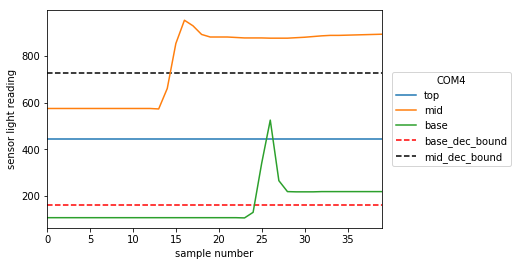

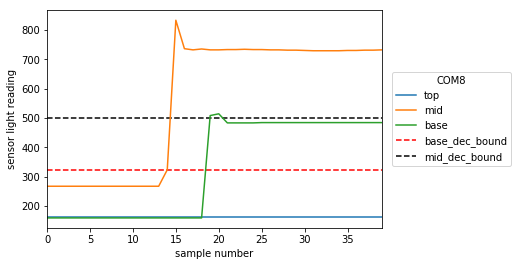

In [162]:
_ = importlib.reload(nectarUtils)
nu.plotCalibration(cal1)
nu.plotCalibration(cal2)

## refref: kmeans might not be that great for calibrating the base sensor for com4 -- if there is an outlier


In [163]:
dataDir

'D:\\Dropbox\\AcademiaDropbox\\UW\\BeeDecisionProject\\NectarData'

# Simultaneous data collection


In [164]:
# start video
parent_conn, child_conn = Pipe()
p = Process(target=saveVid.main, args=(child_conn, ))
p.start()



In [165]:
dat1, dat1_file, dat2, dat2_file = nu.multiReadAndSave(ser1, ser2, cal1, cal2,
                                                       dataDir = dataDir, maxTime = 15)
print("DONE")

8.0 seconds elapsed
8.0 seconds elapsed
ACTION
DONE


In [166]:
parent_conn.send("stop")

In [167]:
if parent_conn.poll():
    movieFileName = parent_conn.recv()
else:
    movieFileName = "unknown"
print(movieFileName)

C:\Users\Combes4\Desktop\TempVids\2019_03_22__15_20_11_076


In [168]:

dat2.head()

,mid,top,base,limit_1,limit_2,timestamp,port,notes
0,739,162,172,0,0,2019-03-22 15:20:43.702668,COM8,"{'colNames': array(['mid', 'top', 'base', 'lim..."
1,738,162,168,0,0,2019-03-22 15:20:43.802847,COM8,NaN
2,739,162,167,0,0,2019-03-22 15:20:43.852948,COM8,NaN
3,738,162,164,0,0,2019-03-22 15:20:43.919827,COM8,NaN
4,739,162,163,0,0,2019-03-22 15:20:43.963036,COM8,NaN


In [175]:
# combine datasets
dat_combined = dat1.append(pd.DataFrame( dat2), ignore_index=True)
dat_combined.loc[1, "notes"] = movieFileName + str("    MovieFile")
dat_combined.head()

,base,limit_1,limit_2,mid,notes,port,timestamp,top
0,123,0,0,889,"{'colNames': array(['base', 'mid', 'top', 'lim...",COM4,2019-03-22 15:20:43.992879,441
1,107,0,0,889,C:\Users\Combes4\Desktop\TempVids\2019_03_22__...,COM4,2019-03-22 15:20:44.048629,442
2,106,0,0,889,NaN,COM4,2019-03-22 15:20:44.097977,442
3,106,0,0,889,NaN,COM4,2019-03-22 15:20:44.142977,441
4,106,0,0,889,NaN,COM4,2019-03-22 15:20:44.192693,441


In [176]:
# save combined dataset
dat_combined.to_csv(os.path.join(dataDir, np.sort([dat2_file, dat1_file])[0].replace(".", "___cmbnd.")), index = False)

In [177]:
dataDir

'D:\\Dropbox\\AcademiaDropbox\\UW\\BeeDecisionProject\\NectarData'

In [ ]:
### refref: save data for when bee is in or out of camera view
## see saveVid file
## may need a calibration

In [ ]:
import subprocess

In [ ]:
# refref here: 
# I want to start a subprocess to collect video data
subprocess.check_call(r"for i in 1 2 3 4 5; do sleep 0.1s; done", shell=True)

In [ ]:
nu.plotTrial(dat1)
nu.plotTrial(dat2)

In [ ]:
plt.figure(figsize = [15,4])
plt.plot(dat_combined.loc[dat_combined.port == "COM8"]["timestamp"],
         dat_combined.loc[dat_combined.port == "COM8"][["top", "mid", "base"]], '-', marker = "o")

plt.show()
plt.figure(figsize = [15,4])
plt.plot(dat_combined.loc[dat_combined.port == "COM4"]["timestamp"],
         dat_combined.loc[dat_combined.port == "COM4"][["top", "mid", "base"]], '-', marker = "o")
plt.show()
#dat_combined.loc[dat_combined.port == "COM4"].plot(y = "base", x = "timestamp")

In [ ]:
_ = importlib.reload(nectarUtils)
t = threading.Thread(target = nu.readAndSave, kwargs={"serial_con" : ser2, "calibrationInfo" : cal2 , 
                                                     "dataDir" : dataDir})
t.start()

In [ ]:
t

In [ ]:
_ = importlib.reload(nectarUtils)
nu.readAndSave(serial_con = ser2, calibrationInfo= cal2, dataDir = dataDir)

In [ ]:
#cal2['topBaseline', 'midBaseline', 'baseBaseline', 'colNames', 'port', 'base_dec_bound', 'mid_dec_bound']